Episode: 1, Timesteps: 8, Reward: 0.0
Episode: 2, Timesteps: 19, Reward: 0.0
Episode: 3, Timesteps: 7, Reward: 0.0
Episode: 4, Timesteps: 6, Reward: 0.0
Episode: 5, Timesteps: 6, Reward: 0.0
Episode: 6, Timesteps: 11, Reward: 0.0
Episode: 7, Timesteps: 30, Reward: 0.0
Episode: 8, Timesteps: 4, Reward: 0.0
Episode: 9, Timesteps: 16, Reward: 0.0
Episode: 10, Timesteps: 22, Reward: 0.0
Episode: 11, Timesteps: 6, Reward: 0.0
Episode: 12, Timesteps: 33, Reward: 0.0
Episode: 13, Timesteps: 2, Reward: 0.0
Episode: 14, Timesteps: 33, Reward: 0.0
Episode: 15, Timesteps: 17, Reward: 0.0
Episode: 16, Timesteps: 42, Reward: 0.0
Episode: 17, Timesteps: 5, Reward: 0.0
Episode: 18, Timesteps: 12, Reward: 0.0
Episode: 19, Timesteps: 11, Reward: 0.0
Episode: 20, Timesteps: 19, Reward: 0.0
Episode: 21, Timesteps: 33, Reward: 0.0
Episode: 22, Timesteps: 22, Reward: 0.0
Episode: 23, Timesteps: 18, Reward: 0.0
Episode: 24, Timesteps: 17, Reward: 0.0
Episode: 25, Timesteps: 16, Reward: 0.0
Episode: 26, Time

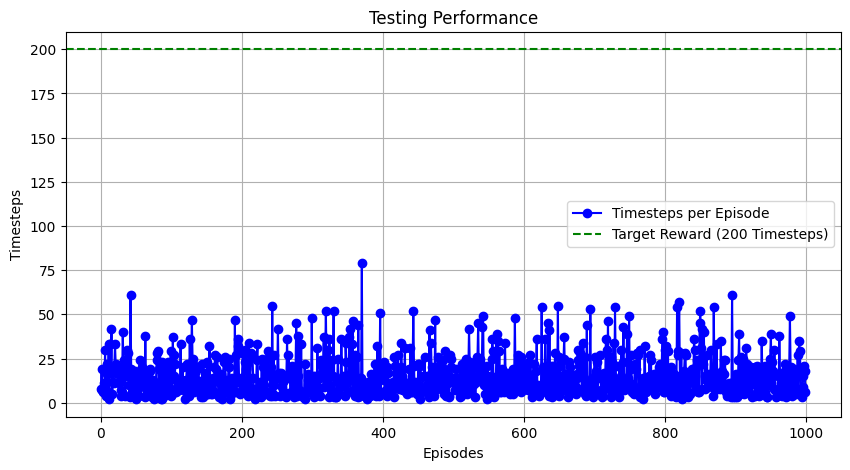

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Initialize environment
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode=None)
n_actions = env.action_space.n
n_states = env.observation_space.n

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000

# Initialize Q-table
q_table = np.zeros((n_states, n_actions))

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

def run(episodes, is_training=True, render=False):
    timesteps_per_episode = []
    rewards_per_episode = []

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        timesteps = 0
        total_reward = 0

        while not done:
            action = choose_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            if is_training:
                q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            state = next_state
            total_reward += reward
            timesteps += 1

            if render:
                env.render()

        timesteps_per_episode.append(timesteps)
        rewards_per_episode.append(total_reward)
        print(f"Episode: {episode+1}, Timesteps: {timesteps}, Reward: {total_reward}")

    # Save Q-table
    if is_training:
        with open("q_table.pkl", "wb") as f:
            pickle.dump(q_table, f)

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(range(episodes), timesteps_per_episode, marker='o', linestyle='-', color='b', label="Timesteps per Episode")
    plt.axhline(y=200, color='green', linestyle="--", label="Target Reward (200 Timesteps)")
    plt.title("Testing Performance")
    plt.xlabel("Episodes")
    plt.ylabel("Timesteps")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run training
run(1000, is_training=True, render=False)


FrozenLake_Q_Learning

In [ ]:
import numpy as np
import gymnasium as gym
from tqdm import tqdm


def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(len(Q[state]))
    else:
        return np.argmax(Q[state])


def q_learning(env, num_episodes, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    pbar = tqdm(total=num_episodes, dynamic_ncols=True)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)

            best_next_action = np.argmax(Q[next_state, :])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state
            episode_reward += reward

        pbar.update(1)
        if episode % 1000 == 0:
            avg_reward = evaluate_policy(env, Q, 100)
            pbar.set_description(f"\nAverage reward after {episode} episodes: {avg_reward:.2f}")

    pbar.close()
    return Q


def evaluate_policy(env, Q, num_episodes):
    total_reward = 0
    policy = np.argmax(Q, axis=1)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward

        total_reward += episode_reward

    return total_reward / num_episodes


def demo_agent(env, Q, num_episodes=1):
    policy = np.argmax(Q, axis=1)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        print("\nEpisode:", episode + 1)

        while not done:
            env.render()
            action = policy[state]
            state, _, done, _, _ = env.step(action)

        env.render()


def main():
    env = gym.make("FrozenLake-v1")
    num_episodes = 10000

    Q = q_learning(env, num_episodes)
    avg_reward = evaluate_policy(env, Q, num_episodes)
    print(f"Average reward after Q-learning: {avg_reward}")

    # Render visualization for 3 episodes
    visual_env = gym.make("FrozenLake-v1", render_mode="human")
    demo_agent(visual_env, Q, 3)


if __name__ == '__main__':
    main()



  0%|          | 0/10000 [00:00<?, ?it/s]

Average reward after 0 episodes: 0.00:   0%|          | 1/10000 [00:00<03:10, 52.57it/s]

Average reward after 0 episodes: 0.00:   2%|▏         | 198/10000 [00:00<00:04, 1978.76it/s]

Average reward after 0 episodes: 0.00:   4%|▍         | 419/10000 [00:00<00:04, 2106.10it/s]

Average reward after 0 episodes: 0.00:   7%|▋         | 688/10000 [00:00<00:03, 2357.46it/s]

Average reward after 0 episodes: 0.00:  10%|▉         | 971/10000 [00:00<00:03, 2542.83it/s]

Average reward after 1000 episodes: 0.00:  10%|█         | 1001/10000 [00:00<00:03, 2542.83it/s]

Average reward after 1000 episodes: 0.00:  12%|█▏        | 1226/10000 [00:00<00:04, 2087.45it/s]

Average reward after 1000 episodes: 0.00:  15%|█▍        | 1459/10000 [00:00<00:03, 2158.99it/s]

Average reward after 1000 episodes: 0.00:  17%|█▋        | 1684/10000 [00:00<00:04, 1793.48it/s]

Average reward after 1000 episodes: 0.00:  19%|█▉        | 1920/10000 [00:00<00:04, 1938.50it/s]



Average reward after Q-learning: 0.0

Episode: 1

Episode: 2

Episode: 3
